# Estimators of the main statistical measures
 
## Mean

Properties of the expected value operator $\operatorname{E}(.)$ of a RV $X$

\begin{align}
E(X + c) &= E(X) + c \\ 
E(X + Y) &= E(X) + E(Y) \\ 
E(aX)    &= a E(X) 
\end{align}

The estimator $\bar{x}$ on a sample of size $n$: $x = x_1, ..., x_n$ is given by
$$
\bar{x} = \frac{1}{n} \sum_i x_i
$$

$\bar{x}$  is itself a RV with properties:
- $E(\bar{x}) = \bar{x}$
- $Var(\bar{x}) = Var(X)/n$.

## Variance

$$
Var(X) = E((X + -E(X))^2) =  E(X^2) + (E(X))^2
$$

The estimator is

$$
\sigma_x^2 = \frac{1}{n-1} \sum_i (x_i - \bar{x})^2
$$

Here the 1 degree of freedom (df) for the divisor. In standard statistical practice, $df=1$ provides an unbiased estimator of the variance of a hypothetical infinite population. $df$=0 provides a maximum likelihood estimate of the variance for normally distributed variables.

## Standart deviation

$$
Std(X) = \sqrt{Var(X)}
$$

The estimator is simply $\sigma_x = \sqrt{\sigma_x^2}$

## Covariance

$$
Cov(X, Y) = E((X -E(X))(Y -E(Y)) =  E(XY) - E(X)(E(Y)
$$

Properties: 
$$
    \operatorname{Cov}(X, X) = \operatorname{Var}(X)\\
    \operatorname{Cov}(X, Y) = \operatorname{Cov}(Y, X)\\
    \operatorname{Cov}(cX, Y) = c \operatorname{Cov}(X, Y)\\
    \operatorname{Cov}(X+c, Y) = \operatorname{Cov}(X, Y)\\
$$

The estimator with $1 df$ is:
$$
\sigma_{xy} = \frac{1}{n-1} \sum_i (x_i - \bar{x}) (y_i - \bar{y})
$$

## Correlation

$$
Cor(X, Y) = \frac{Cov(X, Y)}{Std(X)Std(Y)}
$$

The estimator is
$$
\rho_{xy} = \frac{\sigma_{xy}}{\sigma_{y} \sigma_{y}}
$$

## Standard Error (SE) 

The standard error (SE) is the standard deviation of the sampling distribution of a statistic. 
The SE of the estimator (standard deviation of the sampling distribution) of a statistic is 
$$
SE(X) = \frac{Std(X)}{\sqrt{n}}.
$$

It is most commonly considered for the mean with the estimator $SE(\bar{x}) = s/\sqrt{n}$

## Exercises

- Generate 2 ramdom samples $x \sim N(1.78, 0.1)$, $y \sim N(1.66, 0.1)$ both of size 10.

- Compute $\bar{x}, \sigma_x, \sigma_{xy}$ (`xbar, xvar, xycov`) using only `np.sum()` operation. 
Explore `np.` module to find out the numpy functions that does the same computations and compare them (using `assert`) with your previous results.

# Main distributions

## Normal distribution

The normal or $N$ distribution is useful because of the central limit theorem (CLT) which states that, given certain conditions, the arithmetic mean of a sufficiently large number of iterates of independent random variables, each with a well-defined expected value and well-defined variance, will be approximately normally distributed, regardless of the underlying distribution.
Parameters: $\mu$ mean (location) and $\sigma^2>0$ variance. Estimators:

## The Chi-Square distribution

The chi-square or $\chi_n^2$ distribution with $n$ degrees of freedom (df) is the distribution of a sum of the squares of $n$ independent standard normal random variables $N(0, 1)$. Let $X \sim N(\mu, \sigma^2)$ and $Z=(X - mu)/\sigma \sim N(0, 1)$, then:

- The squared standard $Z^2 \sim \chi_1^2$ (one df).

- **The distribution of sum of squares** the sum of square of $n$ normal RV: $\sum_i^n Z_i^2 \sim \chi_n^2$

The sum of two $\chi^2$ RV with $p$ and $q$ df is a $\chi^2$ RV with $p+q$ df. This is useful when summing/subtracting sum of squares.

## The Fisher's F-distribution

The F-distribution $F_{n, p}$ with $n$ and $p$ df is the ratio of two independant $\chi^2$ variables. Let $X \sim \chi_n^2$ and $Y \sim \chi_p^2$ then: 
$$
F_{n, p} = \frac{X/n}{Y/p}
$$

F-distribution plays a central role in hypothesis testing answering the question: **Are two variances equals?**

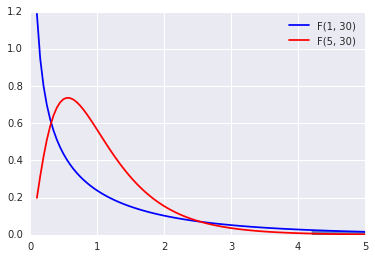

In [26]:
import numpy as np
from scipy.stats import f
import matplotlib.pyplot as plt
%matplotlib inline

fvalues = np.linspace(.1, 5, 100)

# pdf(x, df1, df2): Probability density function at x of F.
plt.plot(fvalues, f.pdf(fvalues, 1, 30), 'b-', label="F(1, 30)")
plt.plot(fvalues, f.pdf(fvalues, 5, 30), 'r-', label="F(5, 30)")
plt.legend()

# cdf(x, df1, df2): Cumulative distribution function of F.
# ie. 
proba_at_f_inf_3 = f.cdf(3, 1, 30) # P(F(1,30) < 3)

# ppf(q, df1, df2): Percent point function (inverse of cdf) at q of F.
f_at_proba_inf_95 = f.ppf(.95, 1, 30) # q such P(F(1,30) < .95)
assert f.cdf(f_at_proba_inf_95, 1, 30) == .95

# sf(x, df1, df2): Survival function (1 - cdf) at x of F.
proba_at_f_sup_3 = f.sf(3, 1, 30) # P(F(1,30) > 3)
assert  proba_at_f_inf_3 + proba_at_f_sup_3 == 1

# p-value: P(F(1, 30)) < 0.05
low_proba_fvalues = fvalues[fvalues > f_at_proba_inf_95]
plt.fill_between(low_proba_fvalues, 0, f.pdf(low_proba_fvalues, 1, 30),
                 alpha=.8, label="P < 0.05")
plt.show()

## The  Student's t-distribution

Let normal RV $M \sim N(0, 1)$ and a $V \sim \chi_n^2$. The t-distribution $T_n$ with $n$ df is the ratio:
$$
T_n = \frac{M}{\sqrt{V/n}}
$$

The distribution of the difference between an estimated parmeter with its true value divided by the standard deviation of the estimated parameter (standard error) follow a t-distribution. **Is this parameters different from a given value ?**

# Testing pairwise associations

Mass univariate statistical analysis: explore association betweens pairs of variable. 

- In statistics, a **categorical variable** or a **factor** is a variable that can take on one of a limited, and usually fixed, number of possible values, thus assigning each individual to a particular group or "category. The levels are the possibles values of the variable. Number of level = 2, binomial, Number of level > 2: multinomial. There is no intrinsic ordering to the categories.  For example, gender is a categorical variable having two categories (male and female) and there is no intrinsic ordering to the categories.  Hair color is also a categorical variable having a number of categories (blonde, brown, brunette, red, etc.) and again, there is no agreed way to order these from highest to lowest.  A purely categorical variable is one that simply allows you to assign categories but you cannot clearly order the variables.  If the variable has a clear ordering, then that variable would be an ordinal variable, as described below.

- An **Ordinal variable** is similar to a categorical variable.  The difference between the two is that there is a clear ordering of the variables.  For example, suppose you have a variable, economic status, with three categories (low, medium and high).  In addition to being able to classify people into these three categories, you can order the categories as low, medium and high.

- A **continuous** or **quantitative variable** $x \in R$ is one that can take any value in a range of possible values possibly infinite.  Eg.: Salary, Experience in years.

What statistical test should I use? http://www.ats.ucla.edu/stat/mult_pkg/whatstat/

## Pearson correlation test (quantitative ~ quantitative)

Test the correlation coeficient of two quantitative variables eg. Is Salary associated with the experience in years ? The test calculates a Pearson correlation coefficient and the p-value for testing non-correlation.

In [27]:
import numpy as np
import scipy.stats as stats
n = 50
x = np.random.normal(size=n)
y = 2 * x + np.random.normal(size=n)

# Compute with scipy
cor, pval = stats.pearsonr(x, y)

##  One sample t-test (quantitative ~ Cte)

The one-sample t-test is used to determine whether a sample comes from a population with a specific mean. For example you want to test if the average height of a population is 1.75m.

### 1. Model the data

Assume that height is normally distributed: $X \sim N(\mu, \sigma)$.

### 2. Fit: estimate the model parameters

$\bar{x}, \sigma_x$ are the estimators of $\mu, \sigma$

### 3. Test

In testing the null hypothesis that the population mean is equal to a specified value $\mu_0=1.75$, one uses the statistic:
$$
    t = \frac{\bar{x} - \mu_0}{\sigma_x/\sqrt{n}} 
$$
Although the parent population does not need to be normally distributed, the distribution of the population of sample means, $\overline{x}$, is assumed to be normal. By the central limit theorem, if the sampling of the parent population is independent then the sample means will be approximately normal.

### Exercise

- Given the following samples, test whether its true mean is 1.75.
Warning, when computing the std or the variance set ddof=1. The default
value 0, leads to the biased estimator of the variance.

In [28]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
np.random.seed(seed=42)  # make example reproducible
n = 100
x = np.random.normal(loc=1.78, scale=.1, size=n)

- Compute the t-value (tval)

- Plot the T(n-1) distribution for 100 tvalues values within [0, 10]. Draw P(T(n-1)>tval) 
  ie. color the surface defined by x values larger than tval below the T(n-1).
  Using the code.

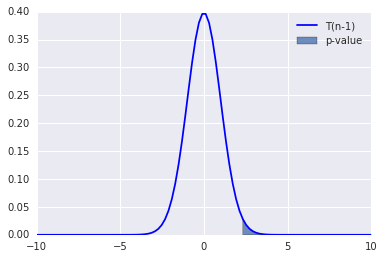

In [29]:
# compute with scipy
tval, pval = stats.ttest_1samp(x, 1.75)

#tval = 2.1598800019529265 # assume the t-value
tvalues = np.linspace(-10, 10, 100)
plt.plot(tvalues, stats.t.pdf(tvalues, n-1), 'b-', label="T(n-1)")
upper_tval_tvalues = tvalues[tvalues > tval]
plt.fill_between(upper_tval_tvalues, 0, stats.t.pdf(upper_tval_tvalues, n-1), alpha=.8, label="p-value")
plt.legend()

- Compute the p-value: P(T(n-1)>tval).

- The p-value is one-sided: a two-sided test would test P(T(n-1) > tval) and P(T(n-1) < -tval). What would be the two sided p-value ?
  
- Compare the two-sided p-value with the one obtained by stats.ttest_1samp
using assert np.allclose(arr1, arr2)

## Two sample t-test  (quantitative ~ categorial (2 levels))

The two-sample t-test (Snedecor and Cochran, 1989) is used to determine if two population means are equal. There are several variations on this test.
If data are paired (eg. 2 measure before and after a treatment for each individual) use the one-sample t-test of the difference. The variances of the two samples may be assumed to be equal (a.k.a. homoscedasticity) or unequal (a.k.a. heteroscedasticity).

### 1. Model the data

Assume that the two RV are normally distributed: $x \sim N(\mu_x, \sigma_x), y \sim N(\mu_y, \sigma_y)$.

### 2. Fit: estimate the model parameters

Estimate means and variances: $\bar{x}, \sigma_x, \bar{y}, \sigma_y$.

### 3. Welch's t-test

Generally t-tests form the ratio between the amount of information explained by the model (ie. the effect size) with the square root of the unexplained variance.

In testing the null hypothesis that the two population means are equal, one uses the t-statistic of unpaired two samples with unequal variances a.k.a the Welch's t test:

$$
    t = \frac{\bar{x} - \bar{y}}{\sqrt{\sigma^2_x/n_x + \sigma^2_y/n_y}} 
      = \frac{\text{effect size}}{\sqrt{\text{unexplained variance}}} 
$$

![title](images/two_samples_ttest.png)

To compute the p-value one need the degrees of freedom associated with this variance estimate. The latter is approximated using the Welch–Satterthwaite equation.

### Exercise

Given the following two sample, test whether their means are equals.

In [30]:
import scipy.stats as stats
nx, ny = 50, 25
x = np.random.normal(loc=1.76, scale=.1, size=nx)
y = np.random.normal(loc=1.70, scale=.12, size=ny)

# Compute with scipy
tval, pval = stats.ttest_ind(x, y, equal_var=False)

- Compute the t-value.

- Compute the p-value. Use the following function to approximate the df needed for the p-value

In [31]:
def unequal_var_ttest_df(v1, n1, v2, n2):
    vn1 = v1 / n1
    vn2 = v2 / n2
    df = (vn1 + vn2)**2 / (vn1**2 / (n1 - 1) + vn2**2 / (n2 - 1))
    return df

# use it:
# df = unequal_var_ttest_df(xvar, nx, yvar, ny)

- The p-value is one-sided: a two-sided test would test P(T > tval)
  and P(T < -tval). What would be the two sided p-value ?

- Compare the two-sided p-value with the one obtained by stats.ttest_ind
using `assert np.allclose(arr1, arr2)`

## Anova F-test (quantitative ~ categorial (>2 levels))

Analysis of variance (ANOVA) rovides a statistical test of whether or not the means of several groups are equal, and therefore generalizes the t-test to more than two groups. ANOVAs are useful for comparing (testing) three or more means (groups or variables) for statistical significance. It is conceptually similar to multiple two-sample t-tests, but is less conservative.

Here we will consider One-way Anova with one IV. 

### 1. Model the data

A company has applied three marketing strategies to three samples of customers in order increase their business volume. The marketing is asking whether the strategies led to different increases of business volume. Let $y_1, y_2 $ and $y_2$ the three samples of business volume increase.

Here we assume the three population were sampled from thre RV are normally distributed: $Y_1 \sim N(\mu_1, \sigma_1), Y_2 \sim N(\mu_2, \sigma_2)$ and $Y_3 \sim N(\mu_3, \sigma_3)$.

### 2. Fit: estimate the model parameters

Estimate means and variances: $\bar{y}_i, \sigma_i \forall i \in {1, 2, 3}$.

### 3. F-test

**Source** https://en.wikipedia.org/wiki/F-test

The ANOVA F-test can be used to assess whether any of the strategies is on average superior, or inferior, to the others versus the null hypothesis that all four strategies yield the same mean response (increase of BV). This is an example of an "omnibus" test, meaning that a single test is performed to detect any of several possible differences. Alternatively, we could carry out pairwise tests among the strategies. The advantage of the ANOVA F-test is that we do not need to pre-specify which strategies are to be compared, and we do not need to adjust for making multiple comparisons. The disadvantage of the ANOVA F-test is that if we reject the null hypothesis, we do not know which strategies can be said to be significantly different from the others.

The formula for the one-way ANOVA F-test statistic is

$$
    F = \frac{\text{explained variance}}{\text{unexplained variance}} ,
$$

or

$$
    F = \frac{\text{between-group variability}}{\text{within-group variability}}.
$$

The "explained variance", or "between-group variability" is

$$
    \sum_i n_i(\bar{Y}_{i\cdot} - \bar{Y})^2/(K-1) 
$$

where $\bar{Y}_{i\cdot}$ denotes the sample mean in the ith group, $n_i$ is the number of observations in the ith group, $\bar{Y}$ denotes the overall mean of the data, and $K$ denotes the number of groups.

The "unexplained variance", or "within-group variability" is

$$
    \sum_{ij} (Y_{ij}-\bar{Y}_{i\cdot})^2/(N-K), 
$$

where $Y_{ij}$ is the jth observation in the ith out of $K$ groups and $N$ is the overall sample size. This F-statistic follows the F-distribution with $K-1, N-K$ degrees of freedom under the null hypothesis. The statistic will be large if the between-group variability is large relative to the within-group variability, which is unlikely to happen if the population means of the groups all have the same value.

Note that when there are only two groups for the one-way ANOVA F-test, $F=t^2$ where $t$ is the Student's t statistic.

### Exercise

Perform an Anova on the following dataset.
- Compute between and within variances
- Compute $F$-value: `fval`
- Compare the p-value with the one obtained by `stats.f_oneway`
using `assert np.allclose(arr1, arr2)`

In [32]:
# dataset
mu_k = np.array([1, 2, 3])    # means of 3 samples
sd_k = np.array([1, 1, 1])    # sd of 3 samples
n_k = np.array([10, 20, 30])  # sizes of 3 samples
grp = [0, 1, 2]               # group labels
n = np.sum(n_k)
label = np.hstack([[k] * n_k[k] for k in [0, 1, 2]])

y = np.zeros(n)
for k in grp:
    y[label == k] = np.random.normal(mu_k[k], sd_k[k], n_k[k])

# Compute with scipy
fval, pval = stats.f_oneway(y[label == 0], y[label == 1], y[label == 2])

## Exercise

Write a function `univar_stat(df, target, variables)` that computes the parametric statistics and p-values between the `target` variable (provided as as string) and all `variables` (provided as a list of string) of the pandas DataFrame `df`. The target is a quantitative variable but variables may be quantitative or qualitative. The function returns a DataFrame with four columns: `variable`, `test`, `value`, `p_value`.

Apply it to salary dataset available at 'https://raw.github.com/duchesnay/pylearn-doc/master/data/salary_table.csv', with target being `S`: salaries for IT staff in a corporation.

# Non parametric test of pairwise associations


## Spearman rank-order correlation (quantitative ~ quantitative)

The Spearman correlation is a nonparametric measure of the monotonicity of the relationship between two datasets. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

Non Parametric Spearman cor test: 0.213253301321 0.137027212615
Parametric Pearson cor test: (0.169316487044706, 0.23980402774530793)


/home/ed203246/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


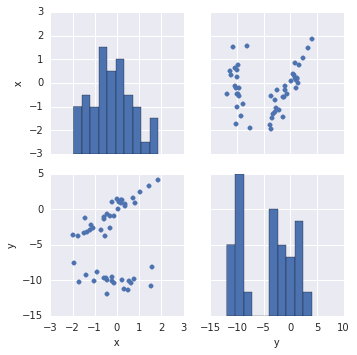

In [33]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(seed=42)  # make example reproducible

n = 50
x = np.random.normal(size=n)
y = 2 * x + np.random.normal(size=n)
y[:20] = np.random.normal(loc=-10, size=20)  # Add 40 outliers

# Compute with scipy
cor, pval = stats.spearmanr(x, y)
print("Non Parametric Spearman cor test:", cor, pval)


# Plot distribution

df = pd.DataFrame(dict(x=x, y=y))
g = sns.PairGrid(df)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

# Compute the parametric Pearsonw cor test
print("Parametric Pearson cor test:", stats.pearsonr(x, y))

## Wilcoxon signed-rank test (quantitative ~ cte)

Source: https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test

The Wilcoxon signed-rank test is a non-parametric statistical hypothesis test used when comparing two related samples, matched samples, or repeated measurements on a single sample to assess whether their population mean ranks differ (i.e. it is a paired difference test). It is equivalent to one-sample test of the difference of paired samples.

It can be used as an alternative to the paired Student's t-test, t-test for matched pairs, or the t-test for dependent samples when the population cannot be assumed to be normally distributed.

When to use it ? Obeserve the data distribution
- presence of outliers
- the distribution of the residuals is not Gaussian 

It has a lower sensitivity compared to t-test. Should not be used because the sample size is small.

Null hypothesis H0: difference between the pairs follows a symmetric distribution around zero

In [34]:
import scipy.stats as stats
n = 20
# Buismess Volume time 0
bv0 = np.random.normal(loc=3, scale=.1, size=n)
# Buismess Volume time 1
bv1 = bv0 + 0.1 + np.random.normal(loc=0, scale=.1, size=n)

# create an outlier
bv1[0] -= 10

# Paired t-test
print(stats.ttest_rel(bv0, bv1))

# Wilcoxon
print(stats.wilcoxon(bv0, bv1))

Ttest_relResult(statistic=0.79137775464686544, pvalue=0.43849192470423648)
WilcoxonResult(statistic=34.0, pvalue=0.0080344288555666693)


## Mann–Whitney U test (quantitative ~ categorial (2 levels))

In statistics, the Mann–Whitney U test (also called the Mann–Whitney–Wilcoxon, Wilcoxon rank-sum test, or Wilcoxon–Mann–Whitney test) is a nonparametric test of the null hypothesis that two samples come from the same population against an alternative hypothesis, especially that a particular population tends to have larger values than the other.

It can be applied on unknown distributions contrary to t-test which has to be applied only on normal distributions, and it is nearly as efficient as the t-test on normal distributions.

In [35]:
import scipy.stats as stats
n = 20
# Buismess Volume group 0
bv0 = np.random.normal(loc=1, scale=.1, size=n)

# Buismess Volume group 1
bv1 = np.random.normal(loc=1.2, scale=.1, size=n)

# create an outlier
bv1[0] -= 10

# Two-samples t-test
print(stats.ttest_ind(bv0, bv1))

# Wilcoxon
print(stats.mannwhitneyu(bv0, bv1))

Ttest_indResult(statistic=0.71518630740491684, pvalue=0.47886529242123199)
MannwhitneyuResult(statistic=71.0, pvalue=0.00025453645903922848)


# Linear model

For the regression case, the statistical model is as follows. Given a (random) sample $(y_i, x_{i}^1, \ldots, x_{i}^p), \, i = 1, \ldots, n$ the relation between the observations $y_i$ and the independent variables $x_i^p$ is formulated as

$$
    y_i = \beta_0 + \beta_1 x_{i}^1 + \cdots + \beta_p X_{i}^p + \varepsilon_i \qquad i = 1, \ldots, n 
$$

- **An independent variable (IV)** is exactly what it sounds like. It is a variable that stands alone and isn't changed by the other variables you are trying to measure. For example, someone's age might be an independent variable. Other factors (such as what they eat, how much they go to school, how much television they watch) aren't going to change a person's age. In fact, when you are looking for some kind of relationship between variables you are trying to see if the independent variable causes some kind of change in the other variables, or dependent variables. In Machine Learning those variables are called the **predictors**.

- A **dependent variable** is exactly what it sounds like. It is something that depends on other factors. For example, a test score could be a dependent variable because it could change depending on several factors such as how much you studied, how much sleep you got the night before you took the test, or even how hungry you were when you took it. Usually when you are looking for a relationship between two things you are trying to find out what makes the dependent variable change the way it does. In Machine Learning this variable is called the **target varbiable**.

## Simple linear regression (one continuous independant variable (IV))

Using the dataset "salary", explore the association between the dependant variable (eg. Salary) and the independant (eg.: Experience is quantitative)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

url = 'https://raw.github.com/duchesnay/pylearn-doc/master/data/salary_table.csv'
salary = pd.read_csv(url)
salary.E = salary.E.map({1:'Bachelor', 2:'Master', 3:'Ph.D'})
salary.M = salary.M.map({0:'N', 1:'Y'})

## Outcome
## S: salaries for IT staff in a corporation.

## Predictors:
## X: experience (years)
## E: education (1=Bachelor's, 2=Master's, 3=Ph.D)
## M: management (1=management, 0=not management)

### 1. Model the data

Model the data on some **hypothesis** eg.: salary is a linear function of the experience.

$$
\text{salary}_i = \beta~\text{experience}_i + \beta_0 + \epsilon_i
$$
More generally:
$$
y_i = \beta~x_i + \beta_0 + \epsilon_i
$$

- $\beta$: the slope or coeficient or parameter of the model

- $\beta_0$: the **intercept** or bias is the second parameter of the model

- $\epsilon_i$: is the ith error, or residual with $\epsilon \sim N(0, \sigma^2)$

This model is similar to a correlation.

### 2. Fit: estimate the model parameters

Estimate $\beta$, $\beta_0$ and $\sigma^2$

Minimizes the **mean squared error (MSE)**, or **Ordinary Least Squares (OLS)** Find $\beta, \beta_0$ that minimizes $F = \sum_i \epsilon_i^2$
$$
\sum_i(y_i - \beta~x_i - \beta_0)^2
$$

$$
\frac{\partial F}{\beta_0} = \sum_i(y_i - \beta~x_i - \beta_0) = 0\\
\sum_i y_i = \beta~\sum_i x_i + n~\beta_0\\
n~\bar{y} = n~\beta~\bar{x} + n~\beta_0\\
\beta_0 = \bar{y} - \beta~\bar{x}\\
$$
$$
\frac{\partial F}{\beta} = \sum_i x_i(y_i - \beta~x_i - \beta_0) = 0
$$

Plug $\beta_0$

$$
\sum_i x_i(y_i - \beta~x_i - \bar{y} + \beta \bar{x}) = 0\\
\sum_i x_i y_i - \bar{y}\sum_i x_i = \beta \sum_i(x_i - \bar{x})
$$

Divide by $n$ both sides

$$
1/n \sum_i x_i y_i  - \bar{y}\bar{x} = 1 / n~\beta  \sum_i(x_i - \bar{x})\\
\beta = \frac{Cov(x, y)}{Var(x)}
$$

y=491.486913 x + 13584.043803,  r:0.538886, r-squared:0.290398, 
p-value:0.000112, std_err:115.823381


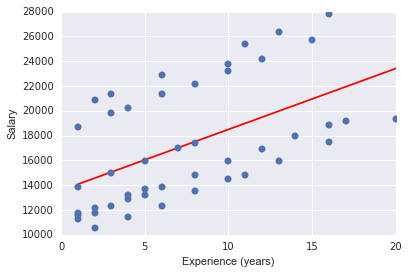

In [37]:
from scipy import stats
import numpy as np
y, x = salary.S, salary.X
beta, beta0, r_value, p_value, std_err = stats.linregress(x,y)
print("y=%f x + %f,  r:%f, r-squared:%f, \np-value:%f, std_err:%f" 
      % (beta, beta0, r_value, r_value**2, p_value, std_err))
# plotting the line
yhat = beta * x  +  beta0 # regression line
plt.plot(x, yhat, 'r-', x, y,'o')
plt.xlabel('Experience (years)')
plt.ylabel('Salary')
plt.show()

### 3. F-Test

#### 3.1 Goodness of fit

The goodness of fit of a statistical model describes how well it fits a set of observations. Measures of goodness of fit typically summarize the discrepancy between observed values and the values expected under the model in question. We will consider the **explained variance**  also known as the coefficient of determination, denoted $R^2$ pronounced **R-squared**.

The SS total ($SS_\text{tot}$) = SS explained by the regression ($SS_\text{reg}$) + SS of residuals unexplained by the regression ($SS_\text{res}$):

$$ SS_\text{tot} = SS_\text{reg} + SS_\text{res}$$
![title](images/Coefficient_of_Determination.png)

$$\bar{y} = \frac{1}{n}\sum_i y_i $$

Errors obtained with intercept only: the total sum of squares:

$$ SS_\text{tot}=\sum_i (y_i-\bar{y})^2$$


The regression sum of squares, also called the explained sum of squares. 

$$SS_\text{reg}=\sum_i (\hat{y_i} -\bar{y})^2$$
Where $\hat{y_i} = \beta x_i + \beta_0$ is the estimated value of salary $\hat{y_i}$ given a value of experience $x_i$.

The sum of squares of residuals, also called the residual sum of squares (RSS):

$$SS_\text{res}=\sum_i (y_i - \hat{y_i})^2$$ also called 

$R^2$ is the explained SS of errors $\equiv$ the variance explain by the regression / total variance

$$
R^2 = \frac{\text{explained SS}}{\text{total SS}}
    = \frac{SS_\text{reg}}{SS_{tot}} 
    = 1 - {SS_{res}\over SS_{tot}}.
$$

####   3.2 Test

Let $\hat{\sigma}^2 = SS_\text{res} / (n-2)$ an estimator of the variance of $\epsilon$. $2$ stem from the number of estimated parameters.

- **Unexplained variance**: $SS_\text{res}/\hat{\sigma}^2 \sim \chi_{n-2}^2$

- **Explained variance**: $SS_\text{reg}/\hat{\sigma}^2 \sim \chi_{1}^2$ since it is the difference of $SS_\text{tot}/\hat{\sigma}^2 (\sim \chi_{n-1})^2$ with $SS_\text{res}/\hat{\sigma}^2 (\sim \chi_{n-2}^2)$ ie. $(n-1) - (n-2)$ df.

The Fisher statistics of the ratio of two variances:
$$
F = \frac{\text{Explained variance}}{\text{Unexplained variance}} = \frac{SS_\text{reg} / 1}{ SS_\text{res} / (n - 2)} \sim F(1, n-2)
$$

Using the F-distribution, compute the probability of observing a value greater than F under H0 i.e.: $P(x > F|H_0)$ ie. the survival function (1 - Cumulative Distribution Function) at x of the given F-distribution.


###  Exercise

Compute:

- $\bar{y}$: `y_mu`

- $SS_\text{tot}$: `ss_tot`

- $SS_\text{reg}$: `ss_reg`

- $SS_\text{res}$: `ss_res`

- Check partition of variance formula based on SS using `assert np.allclose(val1, val2, atol=1e-05)`

- Compute $R^2$ and compare with `r_value` above

- Compute F score

- Compute the p-value:
 *  Plot the $F(1, n)$ distribution for 100 f values within [10, 25]. Draw $P(F(1, n) > F)$ ie. color the surface defined by x values larger than F below the $F(1, n)$.

 * $P(F(1, n) > F)$ is the p-value, compute it.

# Multiple regression

## Theory

Muliple Linear Regression is the basic supervised learning algorithm.

Given: a set of training data $\{x_1, ... , x_N\}$ with targets $\{y_1, . . . , y_N\}$.

In linear regression, we assume that the model that generates the data involves only a linear combination of the input variables.

$$
y(x_i, \beta) = \beta^0 + \beta^1 x_i^1 + ... + \beta^P x_i^P
$$

Or, simplified

$$
y(x_i,\beta) = \beta_0 + \sum_{j=1}^{P-1} \beta_j x_i^j
$$

Extending each sample with an intercept, $x_i := [1, x_i] \in R^P$ allows to use a more general notation based on linear algebra and write it as a simple dot product:
$$
y(x_i,\beta) = x_i^T\beta
$$

$\beta \in R^P$ is a vector of weights which define the $P$ parameters of the model.

Minimize the Mean Squared Error MSE loss:
\begin{align}
MSE(\beta) &= \frac{1}{N}\sum_{i=1}^{N}(y_i - y(x_i,\beta))^2\\
MSE(\beta) &= \frac{1}{N}\sum_{i=1}^{N}(y_i - x_i^T\beta)^2
\end{align}
Let $X = [x_0^T, ... , x_N^T]$ be a $N \times P$ matrix of $N$ samples of $P-1$ input features with one column of one and let be $y = [y_1, ... , y_N]$ be the vector of $N$ targets. Then, using linear algebra, the MSE loss can be rewritten:
\begin{align}
MSE(\beta) &= ||y - x^T\beta||_2^2
\end{align}

The $\beta$ that minimises the MSE can be found: 

\begin{align}
\nabla_\beta (\frac{1}{N} ||y − X\beta||^2) &= 0\\
\frac{1}{N}\nabla_\beta (y - X\beta)y (y - X\beta) &= 0\\
\frac{1}{N}\nabla_\beta (y^Ty - 2 \beta^TX^Ty + \beta X^TX\beta) &= 0\\
−2X^Ty + 2 X^TX\beta &= 0\\
X^TX\beta &= X^Ty\\
\beta &= (X^TX)^{-1} X^Ty\\
\end{align}

$(X^TX)^{-1} X^T$ is the pseudo inverse of $X$.

## Fit with numpy

In [39]:
import numpy as np
import scipy
np.random.seed(seed=42)  # make the example reproducible

# Dataset
N, P = 200, 4
X = np.random.normal(size=N * P).reshape((N, P))
X[:, 0] = 1  # Fist columns is the intercept
print("X:\n", X[:5, :])
betastar = np.array([10, 1, 2, 0])
y = np.dot(X, betastar) + np.random.normal(size=N)

# Estimate the parameters
Xpinv = scipy.linalg.pinv2(X)
betahat = np.dot(Xpinv, y)
print("Estimated beta:\n", betahat)

X:
 [[ 1.         -0.1382643   0.64768854  1.52302986]
 [ 1.         -0.23413696  1.57921282  0.76743473]
 [ 1.          0.54256004 -0.46341769 -0.46572975]
 [ 1.         -1.91328024 -1.72491783 -0.56228753]
 [ 1.          0.31424733 -0.90802408 -1.4123037 ]]
Estimated beta:
 [  1.01278794e+01   9.22467860e-01   1.99776390e+00  -2.77723127e-03]


### Exercise

1. What are the dimensions of pinv$(X)$ ?

2. Compute the MSE between the predicted values and the true values.